## Observations and Insights 

Three observations from this data: 
1) The study in mouse weight vs tumor volume is positvely correlated..the heavy the mouse, the bigger in size the tumor is.
2) After 25 treatments for Mouse m601 the tumor volume was shrinking, meaning that the regimen for Capomulin is an effective medicine for shrinking tumors. The only concern is the spike near the end of treatment, but that could be the body reaching homeostatis with the new drug regimen. 
3) The best medicines to use to shrink tumors would be Capomulin and Ramicane. 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results CSV
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


study_results.head()
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single dataset...using the pd.merge
df_combined_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
df_combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
total_mice = df_combined_mouse_data["Mouse ID"].count()
total_mice

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = df_combined_mouse_data[df_combined_mouse_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# use same .duplicated feature from above, just in MOUSE ID
all_duplicate_rows = df_combined_mouse_data[df_combined_mouse_data.duplicated(['Mouse ID'])]
all_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Use  .drop_duplicates in Mouse ID
df_clean_mouse = df_combined_mouse_data.drop_duplicates("Mouse ID")
df_clean_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [8]:
# Checking the number of mice in the clean DataFrame.
total_mice = df_clean_mouse["Mouse ID"].count()
total_mice

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using Groupby function....groupby('')[''].
mean = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

df_regimen_summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,
                                   "Standard Deviation": standard_deviation, "SEM": sem})


df_regimen_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#reset the index, grouping by "Drug Regimen".count())
drug_count_data = pd.DataFrame(df_combined_mouse_data.groupby(["Drug Regimen"]).count()).reset_index()

#Put in descending order
# df_drug_data = df_drug_data.sort_values(by="Drug Regimen", ascending=False)

#Create the drug count data df down to 2 columns
df_drug_data = drug_count_data[["Drug Regimen", "Mouse ID"]]
#Set Index to "Drug Regimen"
df_drug_data = df_drug_data.set_index("Drug Regimen")


ASK ABOUT ASCNEDING ORDER!

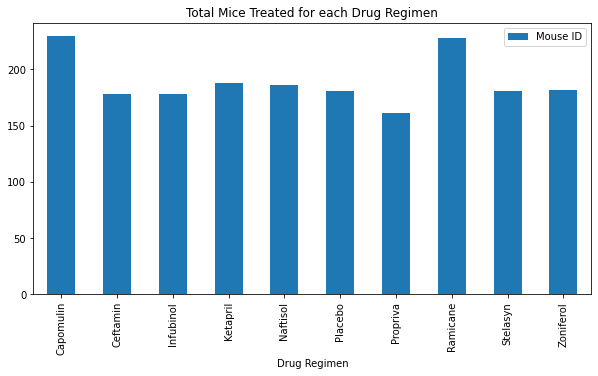

<Figure size 432x288 with 0 Axes>

In [12]:
#Bar Graph using Pandas
df_drug_data.plot(kind="bar", figsize=(10,5))


plt.title("Total Mice Treated for each Drug Regimen")
plt.show()
plt.tight_layout()

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot

In [14]:
# Create a list of the drugs
drugs_list = df_regimen_summary.index.tolist()
drugs_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [15]:
# Create the drugs into a list
drug_count = (df_combined_mouse_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [16]:
# Create the x_axis to be the above list
x_axis = np.arange(len(drug_count))


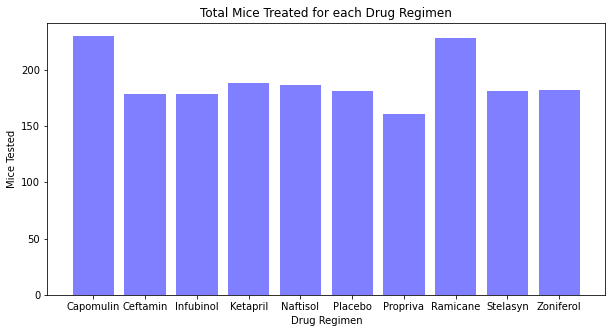

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
x_axis = drugs_list

#Create the bar chat
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_count, color='b', alpha=0.5, align="center")

plt.title("Total Mice Treated for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested");


In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create a dataframe for just gender
df_genders = pd.DataFrame(df_combined_mouse_data.groupby(["Sex"]).count()).reset_index()
df_genders.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [19]:
# Create the df_genders dataframe into only two columns
df_genders = df_genders[["Sex", "Mouse ID"]]
df_genders.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


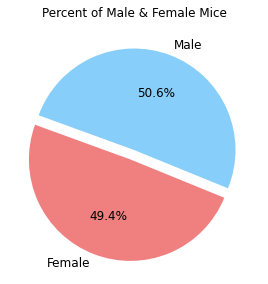

In [20]:
# Create the Pir Chart and Customize
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect="equal")
colors = ["lightcoral", "lightskyblue"]
explode = (0.1,0)
df_genders.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%', explode=explode,
               startangle=160, shadow=False, labels=df_genders["Sex"], colors=colors,
              legend=False, fontsize=12)

plt.title("Percent of Male & Female Mice")
plt.xlabel("")
plt.ylabel("");


In [21]:
#Generate the same pie chart from above using PYPLOT
gender_count = (df_combined_mouse_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

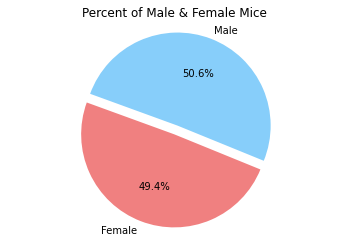

In [22]:
# Add in info from the "Sex" and "Age_months" into the pie chart
labels = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]
explode = (0.1,0)

#Create the pie char in pylpot
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=160)
plt.axis("equal");
plt.title("Percent of Male & Female Mice");

## Quartiles, Outliers and Boxplots

In [23]:
df_combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [25]:
#Sort and arrange columns: "Drug Regimen", "Mouse ID", and "Timepoint"
df_tumor = df_combined_mouse_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_last = df_tumor.loc[df_tumor["Timepoint"]==45]
df_last.head().reset_index()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [26]:
# Create empty list to fill with tumor vol data (for plotting)
df_tumor_vol = df_last.sort_values

In [27]:

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [31]:
# Create a DF with just capomulin data
df_capomulin = df_combined_mouse_data.loc[df_combined_mouse_data["Drug Regimen"] == "Capomulin"]
df_capomulin = df_capomulin.reset_index()

#Get data for one mouse
mouse_capo = df_capomulin.loc[df_capomulin["Mouse ID"] == "m601"]
mouse_capo

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
220,1883,m601,0,45.000000,0,Capomulin,Male,22,17
221,1884,m601,5,41.408591,1,Capomulin,Male,22,17
222,1885,m601,10,36.825367,1,Capomulin,Male,22,17
223,1886,m601,15,35.464612,1,Capomulin,Male,22,17
224,1887,m601,20,34.255732,1,Capomulin,Male,22,17
225,1888,m601,25,33.118756,1,Capomulin,Male,22,17
226,1889,m601,30,31.758275,1,Capomulin,Male,22,17
227,1890,m601,35,30.834357,1,Capomulin,Male,22,17
228,1891,m601,40,31.378045,1,Capomulin,Male,22,17
229,1892,m601,45,28.430964,1,Capomulin,Male,22,17


In [32]:
# Grab the timepoint and tumor volume for this one mouse, and arrange into two columns
mouse_capo = mouse_capo.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Reset the index 
mouse_capo = mouse_capo.reset_index(drop=True)


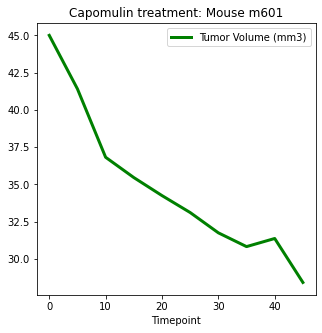

In [33]:
# Create the line plot showing the Capomulin treatment with this one mouse
mouse_capo.set_index("Timepoint").plot(figsize=(5,5), linewidth=3, color="green", title="Capomulin treatment: Mouse m601");


In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Use the capomulin dataframe, and arrange into 3 columns "Mouse ID", "Weight (g)", and "Tumor Volume (mm3)" 
df_mouse_weight = df_capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

In [36]:
#Get average tumor volume for each mouse under Capomulin regimen..put into DataFrame
average_tumor_volume = pd.DataFrame(df_mouse_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

#rename tumor volume (mm3) to Average Tumor Volume...rename(columns={"":""})...refer stack overflow
average_tumor_volume = average_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
average_tumor_volume.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


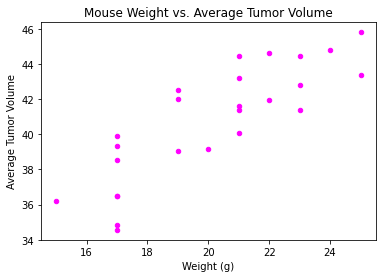

In [37]:
#Create the Scatter plot of the above data
average_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", figsize=(6,4), color="magenta", title="Mouse Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = average_tumor_volume.iloc[:,2]
tumor_volume = average_tumor_volume.iloc[:,1]
#compute Pearson correlation between the two
correlation = st.pearsonr(mice_weight,tumor_volume)
print(f'''
The Correlation Coefficient between mouse weight and tumor volume is {round(correlation[0],2)}
''') 



The Correlation Coefficient between mouse weight and tumor volume is 0.84



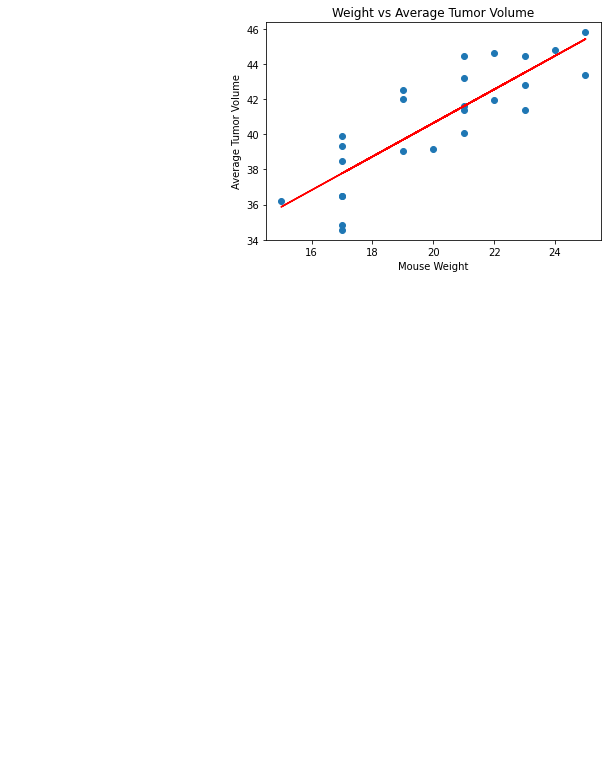

In [44]:
# Create a line of regression for 
x_values = average_tumor_volume["Weight (g)"]
y_values = average_tumor_volume["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,5), fontsize=12)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Weight vs Average Tumor Volume")
plt.show()
